# Tutorial 1 : Exploratory Data Analysis

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from pathlib import Path
from utils.visualization import plot

## Get low level features (with ensembled score of EfficientNet) as pandas dataframe

In [2]:
df= pd.read_csv('./data/msi_features.csv', index_col=0)
df= df[df['neoplastic'].notnull()]


In [3]:
df

,filename,MSS_or_MSI,train_or_test,cohort,case_id,fold,ensembled_MSI_score,prob_ADI,prob_BACK,prob_DEB,...,pred_STR,pred_TUM,no-label,neoplastic,inflammatory,connective,necrosis,non-neoplastic,benign_gland,malignant_gland
index,,,,,,,,,,,,,,,,,,,,,
0,blk-AAADECQEWVSD-TCGA-CM-4746-01Z-00-DX1.png,MSI,train,CRC,TCGA-CM-4746,0.0,0.860316,2.389636e-05,3.844678e-05,2.004841e-01,...,0,1,21.0,172.0,2.0,9.0,199.0,0.0,1,2
1,blk-AAADTPTGAKQV-TCGA-A6-3809-01Z-00-DX1.png,MSI,train,CRC,TCGA-A6-3809,1.0,0.840550,3.123270e-04,4.922440e-04,7.543734e-01,...,0,0,5.0,121.0,6.0,11.0,65.0,3.0,1,3
2,blk-AAAFQELPMPTI-TCGA-AA-3715-01Z-00-DX1.png,MSI,train,CRC,TCGA-AA-3715,2.0,0.401440,4.376866e-03,5.128892e-02,2.625247e-01,...,0,1,10.0,40.0,7.0,41.0,22.0,0.0,0,0
3,blk-AAAGNSGLEPNP-TCGA-CM-4746-01Z-00-DX1.png,MSI,train,CRC,TCGA-CM-4746,0.0,0.952484,2.502636e-07,2.858779e-07,1.834035e-06,...,0,1,8.0,212.0,0.0,3.0,106.0,0.0,0,2
4,blk-AAAHDPKQAIIV-TCGA-CK-5913-01Z-00-DX1.png,MSI,train,CRC,TCGA-CK-5913,3.0,0.221062,1.010200e-03,2.056250e-03,4.170797e-01,...,0,0,4.0,34.0,24.0,36.0,177.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410885,blk-YYYQYGMVSHMT-TCGA-D7-6519-01Z-00-DX2.png,MSS,test,STAD,TCGA-D7-6519,NaN,0.004389,3.550867e-07,5.609903e-07,6.136730e-07,...,0,1,5.0,136.0,4.0,12.0,17.0,0.0,0,1
410886,blk-YYYTLCTQSSFV-TCGA-VQ-A923-01Z-00-DX1.png,MSS,test,STAD,TCGA-VQ-A923,NaN,0.912083,7.033791e-05,9.953414e-05,4.061740e-02,...,0,1,10.0,81.0,1.0,0.0,137.0,0.0,0,0
410887,blk-YYYWCHGHHCAG-TCGA-VQ-A8PJ-01Z-00-DX1.png,MSS,test,STAD,TCGA-VQ-A8PJ,NaN,0.002291,3.177189e-06,2.703736e-06,8.204514e-06,...,0,1,1.0,119.0,1.0,2.0,4.0,0.0,0,2


## Basic statistics

In [4]:
df[(df['MSS_or_MSI'] == 'MSS') & (df['cohort'] == 'CRC')]['necrosis'].describe()

count    116828.000000
mean         53.251695
std          59.215161
min           0.000000
25%          15.000000
50%          34.000000
75%          69.000000
max         597.000000
Name: necrosis, dtype: float64

In [5]:
df[(df['MSS_or_MSI'] == 'MSI') & (df['cohort'] == 'CRC')]['necrosis'].describe()

count    74902.000000
mean        70.211944
std         63.806024
min          0.000000
25%         25.000000
50%         53.000000
75%         97.000000
max        673.000000
Name: necrosis, dtype: float64

## Retrive top 1 MSS score patch in CRC test set as a sample.

In [30]:
sample_idx = df[(df['train_or_test'] == 'test') & (df['cohort'] == 'CRC')].sort_values(by='ensembled_MSI_score', ascending=True).index[0]
df.loc[sample_idx]

filename               blk-TMIGEPVTWTVC-TCGA-AA-3837-01Z-00-DX1.png
MSS_or_MSI                                                      MSS
train_or_test                                                  test
cohort                                                          CRC
case_id                                                TCGA-AA-3837
fold                                                            NaN
ensembled_MSI_score                                             0.0
prob_ADI                                                   0.000577
prob_BACK                                                  0.000684
prob_DEB                                                   0.008405
prob_LYM                                                   0.074873
prob_MUC                                                   0.000911
prob_MUS                                                   0.000708
prob_NORM                                                  0.216608
prob_STR                                        


- Tissue class : `ADI`, `BACK`, `DEB`, `LYM`, `MUC`, `MUS`, `NORM`, `STR`, `TUM`<br />
prefixes:<br />
prob, probability<br />
pred, one-hot encoded prediction (argmax_tissue)
- Cell class : `no-label`, `neoplastic`, `inflammatory`, `connective`, `necrosis`, `non-neoplastic`
- Gland class : `benign gland`, `malignant gland`

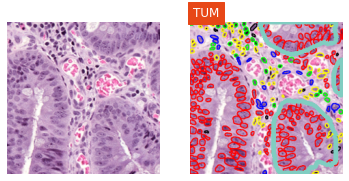

In [27]:
sample_index = sample_idx
patch_name = str(Path(df.loc[sample_index, 'filename']).stem)
patch_sample_base = './data/patch_sample'
patch_sample_path = f'{patch_sample_base}/{patch_name}.png'
patch_sample_img = cv2.imread(patch_sample_path)
patch_sample_img = cv2.cvtColor(patch_sample_img, cv2.COLOR_BGR2RGB)

f,a=plt.subplots(1,2)
a[0].imshow(patch_sample_img)
plot(a[1], df, sample_index) 
for ind in range(2):
    a[ind].axis('off')

## Retrive top 1 MSI score patch in CRC test set as a sample.

In [32]:
sample_idx = df[(df['train_or_test'] == 'test') & (df['cohort'] == 'CRC')].sort_values(by='ensembled_MSI_score', ascending=False).index[0]
df.loc[sample_idx]

filename               blk-EYIAGQICRLWL-TCGA-CM-4743-01Z-00-DX1.png
MSS_or_MSI                                                      MSI
train_or_test                                                  test
cohort                                                          CRC
case_id                                                TCGA-CM-4743
fold                                                            NaN
ensembled_MSI_score                                        0.999837
prob_ADI                                                   0.000118
prob_BACK                                                  0.000137
prob_DEB                                                   0.043201
prob_LYM                                                   0.955557
prob_MUC                                                   0.000109
prob_MUS                                                   0.000105
prob_NORM                                                   0.00007
prob_STR                                        

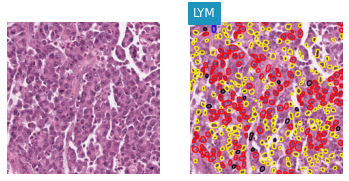

In [33]:
sample_index = sample_idx
patch_name = str(Path(df.loc[sample_index, 'filename']).stem)
patch_sample_base = './data/patch_sample'
patch_sample_path = f'{patch_sample_base}/{patch_name}.png'
patch_sample_img = cv2.imread(patch_sample_path)
patch_sample_img = cv2.cvtColor(patch_sample_img, cv2.COLOR_BGR2RGB)

f,a=plt.subplots(1,2)
a[0].imshow(patch_sample_img)
plot(a[1], df, sample_index) 
for ind in range(2):
    a[ind].axis('off')